# Tamer Kanak - 201805069

**Importing Dataset**


In [1]:
import pandas as pd
data = pd.read_csv("aydın_house_price.csv", delimiter = ";")
data.drop_duplicates(inplace=True)

**Let's check the data!**


In [2]:
data.head()

,Ay,Dolar,Euro,Altın,Petrol,Beton,Demir,Fiyat,Son Güncelleme Tarihi,Konut Tipi,...,Bulunduğu Kat,Bina Yaşı,Isınma Tipi,Eşya Durumu,Banyo Sayısı,Cephe,Kira Getirisi,Kullanım Durumu,Aidat,Yakıt Tipi
0,1,"29,3957","32,7061","1966,77","80,19",1900,"21939,81",1.950.000 TL,12 12 2023,Daire,...,3. Kat,5 Yaşında,Kombi,Eşyalı Değil,1,NaN,NaN,Boş,NaN,Doğalgaz
1,1,"29,3957","32,7061","1966,77","80,19",1900,"21939,81",1.800.000 TL,10 10 2023,Daire,...,Ara Kat,25 Yaşında,Kombi,Eşyalı Değil,1,"Kuzey, Batı",NaN,NaN,NaN,Doğalgaz
2,1,"29,3957","32,7061","1966,77","80,19",1900,"21939,81",2.875.000 TL,26 12 2023,Daire,...,En Üst Kat,9 Yaşında,Kombi,Eşyalı Değil,1,"Kuzey, Güney, Batı",8.000 TL,Mülk Sahibi,100 TL,Doğalgaz
3,1,"29,3957","32,7061","1966,77","80,19",1900,"21939,81",1.850.000 TL,26 12 2023,Daire,...,3. Kat,35 Yaşında,Isıtma Yok,Eşyalı Değil,1,NaN,NaN,Boş,30 TL,NaN
4,1,"29,3957","32,7061","1966,77","80,19",1900,"21939,81",2.000.000 TL,26 12 2023,Daire,...,2. Kat,22 Yaşında,Kombi,Eşyalı Değil,1,"Kuzey, Güney, Doğu",NaN,Kiracılı,NaN,Doğalgaz


**Delete unnecessary things in columns.**


In [3]:
print(data["Dolar"].value_counts())
data["Dolar"] = data["Dolar"].str.replace(",", ".").astype(float)

print(data["Euro"].value_counts())
data["Euro"] = data["Euro"].str.replace(",", ".").astype(float)

print(data["Altın"].value_counts())
data["Altın"] = data["Altın"].str.replace(",", ".").astype(float)

print(data["Petrol"].value_counts())
data["Petrol"] = data["Petrol"].str.replace(",", ".").astype(float)

print(data["Demir"].value_counts())
data["Demir"] = data["Demir"].str.replace(",", ".").astype(float)

data["Fiyat"] = data["Fiyat"].str.replace(".", "")
data["Fiyat"] = data["Fiyat"].str.replace("TL", "").astype(float)

data.drop("Son Güncelleme Tarihi", axis=1, inplace=True)

29,3957    883
29,8403    776
31,1231    537
Name: Dolar, dtype: int64
32,7061    883
32,6801    776
33,7927    537
Name: Euro, dtype: int64
1966,77    883
1960,79    776
2033,63    537
Name: Altın, dtype: int64
80,19    883
78,76    776
80,58    537
Name: Petrol, dtype: int64
21939,81    883
22829,17    776
23638,43    537
Name: Demir, dtype: int64


c:\users\tamer\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


**Since the "Daire" value is dominant in the column named "Konut Tipi", we remove this column from the dataset.**


In [4]:
print(data["Konut Tipi"].value_counts())
print("Size of the dataset: ", len(data))
data.drop("Konut Tipi", axis=1, inplace=True) #2196 Sample - 1888 Sample "Daire"

Daire          1888
Müstakil Ev     110
Villa            77
Residence        45
Bina             35
Köy Evi          31
Çiftlik Evi       4
Prefabrik         4
Loft Daire        2
Name: Konut Tipi, dtype: int64
Size of the dataset:  2196


In [5]:
print(data.isnull().sum())

Ay                    0
Dolar                 0
Euro                  0
Altın                 0
Petrol                0
Beton                 0
Demir                 0
Fiyat                 0
Mahalle               0
 Net M2             116
Oda                 368
 Salon Sayısı       368
Bulunduğu Kat         0
Bina Yaşı             0
Isınma Tipi           0
Eşya Durumu           0
Banyo Sayısı          0
Cephe               767
Kira Getirisi      1494
Kullanım Durumu     467
Aidat              1416
Yakıt Tipi          678
dtype: int64


**I converted the "Mahalle" column to Latitude and Longitude values, but it reduced the success rate very much. Label encoding also decreased the success rate, so I removed this column from the dataset.**


In [6]:
data.drop("Mahalle", axis=1, inplace=True)
data.reset_index(inplace=True)

**Modifying the "Bulunduğu Kat" column.**


In [7]:
data["Bulunduğu Kat"] = data["Bulunduğu Kat"].fillna(0)
floor_dict = {
      "Çatı Katı": 9,
      "En Üst Kat": 9,
      "Ara Kat": 4,
      "Kot 1": -1,
      "Kot 2": -2,
      "Kot 3": -3,
  }
for i in range(len(data)):
    floor_str = data.loc[i, "Bulunduğu Kat"]
    
    if isinstance(floor_str, str):
      if floor_str in floor_dict:
        data.loc[i, "Bulunduğu Kat"] = floor_dict[floor_str]
      elif floor_str.endswith(". Kat"):
        floor_str = floor_str[:-5]
        data.loc[i, "Bulunduğu Kat"] = int(floor_str)
      else:
        data.loc[i, "Bulunduğu Kat"] = 0
data["Bulunduğu Kat"] = data["Bulunduğu Kat"].astype(int)

**Modifying the "Bina Yaşı" column.**


In [8]:
for i in range(len(data)):
    age_str = data.loc[i, "Bina Yaşı"]
    if isinstance(age_str, str):
      if age_str == "Sıfır Bina":
        data.loc[i, "Bina Yaşı"] = 0
      elif age_str.endswith(" Yaşında"):
        age_str = age_str[:-8]
        data.loc[i, "Bina Yaşı"] = int(age_str)
      else:
        data.loc[i, "Bina Yaşı"] = 0
data["Bina Yaşı"] = data["Bina Yaşı"].astype(int)         

In [9]:
print(data["Isınma Tipi"].value_counts())

Kombi                  1447
Klima                   213
Soba                    174
Merkezi                 128
Yerden Isıtma            85
Isıtma Yok               53
Merkezi (Pay Ölçer)      45
Belirtilmemiş            16
Isı Pompası              14
Kat Kaloriferi           10
Doğalgaz Sobası           7
Güneş Enerjisi            4
Name: Isınma Tipi, dtype: int64


**Modifying the "Isınma Tipi" column.**

- Merkezi \(Pay Ölçer\)
- Belirtilmemiş
- Isı Pompası
- Kat Kaloriferi
- Doğalgaz Sobası
- Güneş Enerjisi

columns will be marked as "Diğer" due to their small number in dataset.



In [10]:
heating_type_dict = {
      "Merkezi (Pay Ölçer)": "Diğer",
      "Belirtilmemiş": "Diğer",
      "Isı Pompası": "Diğer",
      "Kat Kaloriferi": "Diğer",
      "Doğalgaz Sobası": "Diğer",
      "Güneş Enerjisi": "Diğer",
  }
for i in range(len(data)):
    heating_type = data.loc[i, "Isınma Tipi"]
    if isinstance(heating_type, str):
      if heating_type in heating_type_dict:
        data.loc[i, "Isınma Tipi"] = heating_type_dict[heating_type]
        
heating_type_onehot = pd.get_dummies(data["Isınma Tipi"], prefix="Isınma_", drop_first=True).astype(int)
data = pd.concat([data, heating_type_onehot], axis=1)
data.drop("Isınma Tipi", axis = 1, inplace = True)

**Modifying the "Eşya Durumu" column.**


In [11]:
print(data["Eşya Durumu"].value_counts())
data["Eşya Durumu"] = data["Eşya Durumu"].map({"Eşyalı": 1, "Eşyalı Değil": 0})

Eşyalı Değil    1982
Eşyalı           214
Name: Eşya Durumu, dtype: int64


**I split the "Cephe" column in order to indicate which facade the house faces with 4 columns in the dataset.**


In [12]:
data["Kuzey"] = data["Cephe"].apply(lambda x: 1 if isinstance(x, str) and "Kuzey" in x else 0)
data["Güney"] = data["Cephe"].apply(lambda x: 1 if isinstance(x, str) and "Güney" in x else 0)
data["Doğu"] = data["Cephe"].apply(lambda x: 1 if isinstance(x, str) and "Doğu" in x else 0)
data["Batı"] = data["Cephe"].apply(lambda x: 1 if isinstance(x, str) and "Batı" in x else 0)

data.drop("Cephe", axis = 1, inplace = True)

In [13]:
print(data.isnull().sum())

index                       0
Ay                          0
Dolar                       0
Euro                        0
Altın                       0
Petrol                      0
Beton                       0
Demir                       0
Fiyat                       0
 Net M2                   116
Oda                       368
 Salon Sayısı             368
Bulunduğu Kat               0
Bina Yaşı                   0
Eşya Durumu                 0
Banyo Sayısı                0
Kira Getirisi            1494
Kullanım Durumu           467
Aidat                    1416
Yakıt Tipi                678
Isınma__Isıtma Yok          0
Isınma__Klima               0
Isınma__Kombi               0
Isınma__Merkezi             0
Isınma__Soba                0
Isınma__Yerden Isıtma       0
Kuzey                       0
Güney                       0
Doğu                        0
Batı                        0
dtype: int64


**We delete this column because it contains too many null values.**



In [14]:
data.drop("Kira Getirisi", axis = 1, inplace = True)

**One Hot Encoding of the column "Kullanım Durumu".**


In [15]:
print(data["Kullanım Durumu"].value_counts())
data = data[data["Kullanım Durumu"] != "Belirtilmemiş"]
status_onehot = pd.get_dummies(data["Kullanım Durumu"], prefix="KullanımDurumu_", drop_first=True).astype(int)
data = pd.concat([data, status_onehot], axis=1)
data.drop("Kullanım Durumu", axis = 1, inplace = True)

Boş              853
Kiracılı         498
Mülk Sahibi      328
Belirtilmemiş     50
Name: Kullanım Durumu, dtype: int64


**We delete this column because it contains too many null values.**


In [16]:
print(data.isnull().sum())
data.drop("Aidat", axis = 1, inplace = True)

index                             0
Ay                                0
Dolar                             0
Euro                              0
Altın                             0
Petrol                            0
Beton                             0
Demir                             0
Fiyat                             0
 Net M2                         116
Oda                             368
 Salon Sayısı                   368
Bulunduğu Kat                     0
Bina Yaşı                         0
Eşya Durumu                       0
Banyo Sayısı                      0
Aidat                          1390
Yakıt Tipi                      674
Isınma__Isıtma Yok                0
Isınma__Klima                     0
Isınma__Kombi                     0
Isınma__Merkezi                   0
Isınma__Soba                      0
Isınma__Yerden Isıtma             0
Kuzey                             0
Güney                             0
Doğu                              0
Batı                        

**We delete this column because it contains too many null values and one value is dominant.**


In [17]:
print(data["Yakıt Tipi"].value_counts())
data.drop(columns=["Yakıt Tipi"], axis = 1, inplace = True)

Doğalgaz      1135
Kömür-Odun     182
Elektrik       152
Akaryakıt        3
Name: Yakıt Tipi, dtype: int64


In [18]:
print(data.isnull().sum())

index                            0
Ay                               0
Dolar                            0
Euro                             0
Altın                            0
Petrol                           0
Beton                            0
Demir                            0
Fiyat                            0
 Net M2                        116
Oda                            368
 Salon Sayısı                  368
Bulunduğu Kat                    0
Bina Yaşı                        0
Eşya Durumu                      0
Banyo Sayısı                     0
Isınma__Isıtma Yok               0
Isınma__Klima                    0
Isınma__Kombi                    0
Isınma__Merkezi                  0
Isınma__Soba                     0
Isınma__Yerden Isıtma            0
Kuzey                            0
Güney                            0
Doğu                             0
Batı                             0
KullanımDurumu__Kiracılı         0
KullanımDurumu__Mülk Sahibi      0
dtype: int64


**Visualisation of some values before they are edited.**


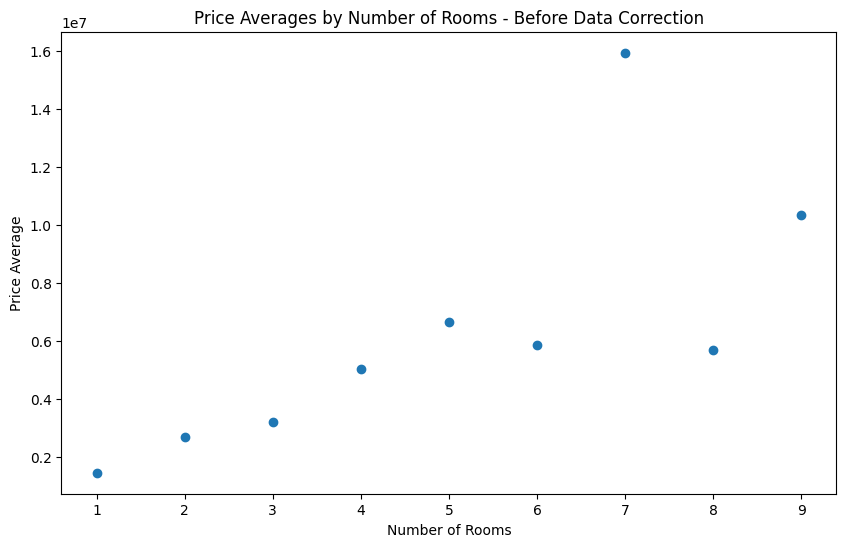

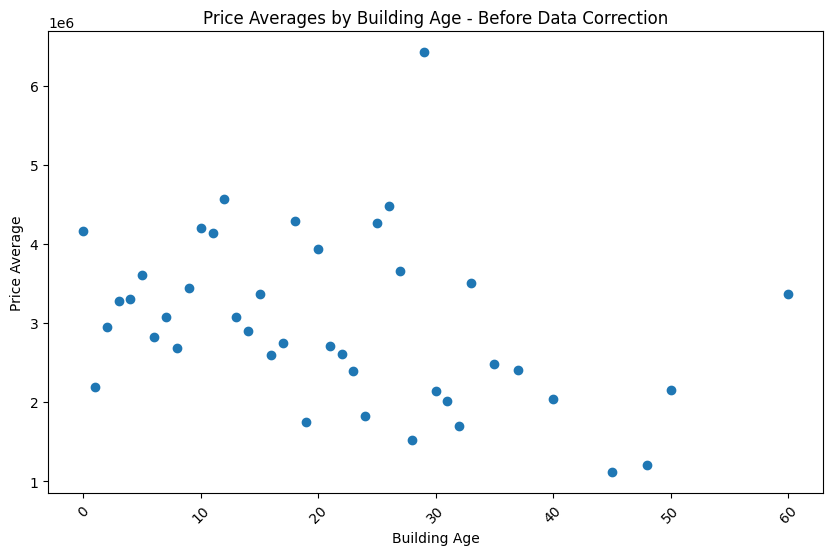

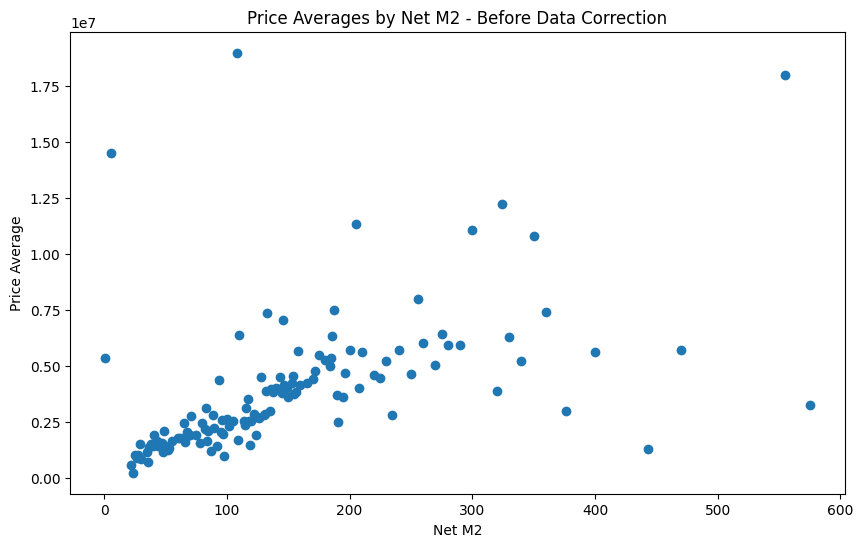

In [19]:
import matplotlib.pyplot as plt

# Calculate and rank the "Fiyat" averages by "Oda" column.
roomPriceAvg = data.groupby("Oda ")["Fiyat"].mean().sort_values()

# Create a graph.
plt.figure(figsize=(10, 6))
plt.scatter(roomPriceAvg.index, roomPriceAvg.values)
plt.xlabel("Number of Rooms")
plt.ylabel("Price Average")
plt.title("Price Averages by Number of Rooms - Before Data Correction")
plt.show()

# Calculate and rank the "Fiyat" averages by "Bina Yaşı" column.
buildingAgePriceAvg = data.groupby("Bina Yaşı")["Fiyat"].mean().sort_values()

# Create a graph.
plt.figure(figsize=(10, 6))
plt.scatter(buildingAgePriceAvg.index, buildingAgePriceAvg.values)
plt.xlabel("Building Age")
plt.ylabel("Price Average")
plt.title("Price Averages by Building Age - Before Data Correction")
plt.xticks(rotation=45)  # x etiketlerini yatık şekilde yazdır
plt.show()

# Calculate and rank the "Fiyat" averages by "Net M2" column.
netM2PriceAvg = data.groupby(" Net M2")["Fiyat"].mean().sort_values()

# Create a graph.
plt.figure(figsize=(10, 6))
plt.scatter(netM2PriceAvg.index, netM2PriceAvg.values)
plt.xlabel("Net M2")
plt.ylabel("Price Average")
plt.title("Price Averages by Net M2 - Before Data Correction")
plt.show()

**Outlier data processing stage.**


In [20]:
data = data[data[" Net M2"] > 20]
data.loc[(data["Oda "].isnull()) & (data[" Net M2"] < 60), "Oda "] = 1
data.loc[(data["Oda "].isnull()) & (data[" Net M2"].between(60, 90)), "Oda "] = 2
data.loc[(data["Oda "].isnull()) & (data[" Net M2"].between(90, 150)), "Oda "] = 3
data.loc[(data["Oda "].isnull()) & (data[" Net M2"].between(150, 200)), "Oda "] = 4
data.loc[(data["Oda "].isnull()) & (data[" Net M2"].between(200, 300)), "Oda "] = 5
data.loc[(data["Oda "].isnull()) & (data[" Net M2"].between(300, 575)), "Oda "] = 6

**We fill in the missing values in the "Salon Sayısı" column with KNNImputer.**


In [21]:
from sklearn.impute import KNNImputer
data.dropna(subset=[" Net M2"], inplace=True)
imputerSalon = KNNImputer(n_neighbors=3)
data[" Salon Sayısı"] = imputerSalon.fit_transform(data[[" Salon Sayısı"]])
data[" Salon Sayısı"] = data[" Salon Sayısı"].astype("int")

**Outlier data processing stage.**


In [22]:
data["Fiyat"] = data["Fiyat"].apply(lambda x: '{:.0f}'.format(float(x))).astype(int)
data = data[data["Fiyat"] >= 100000]
data = data[data["Fiyat"] < 175000000]
data = data[data["Banyo Sayısı"] < 6]

**Removing unnecessary columns**


In [23]:
data.drop(columns=["index", "Ay", "Dolar", "Euro", "Altın", "Petrol", "Beton", "Demir"], axis = 1, inplace = True)

**Since the "Salon Sayısı" and "Oda" columns are increasing equally with each other, I added these columns and made them into a single column.**


In [24]:
data['Oda '] = data.apply(lambda row: row['Oda '] + row[' Salon Sayısı'], axis=1)

**Visualisation of some values after they are edited.**


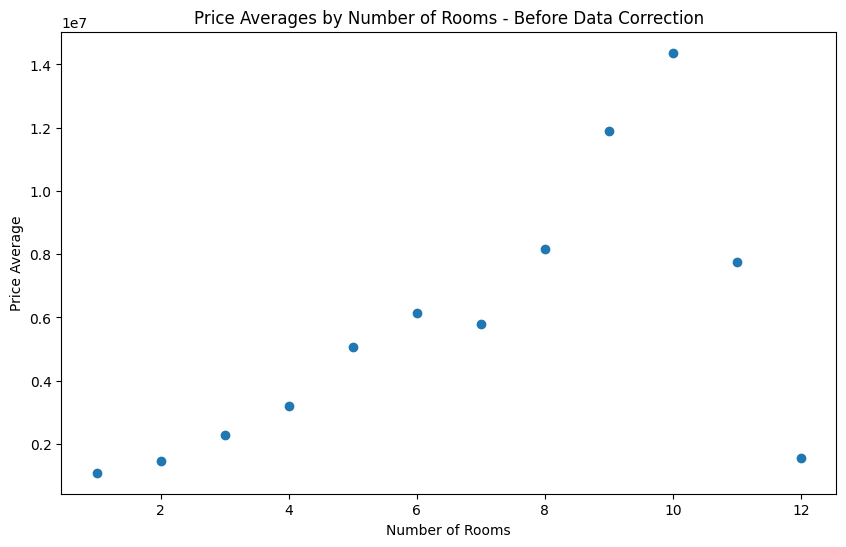

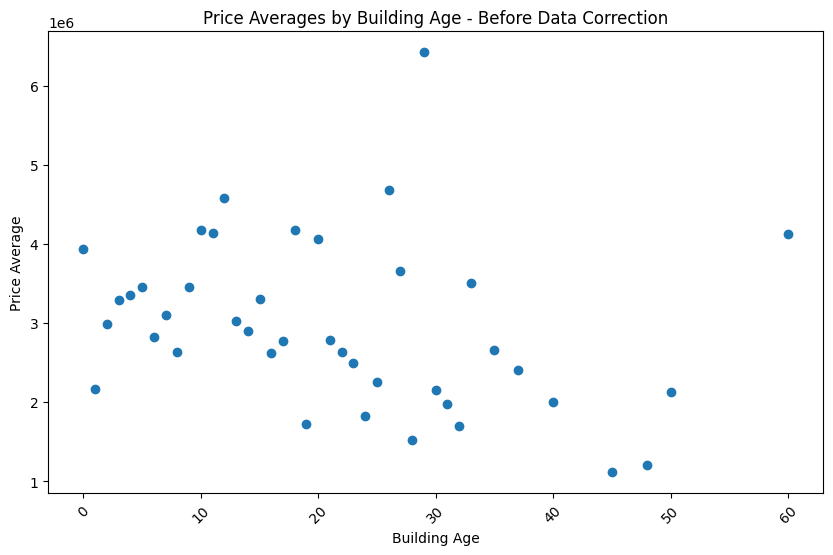

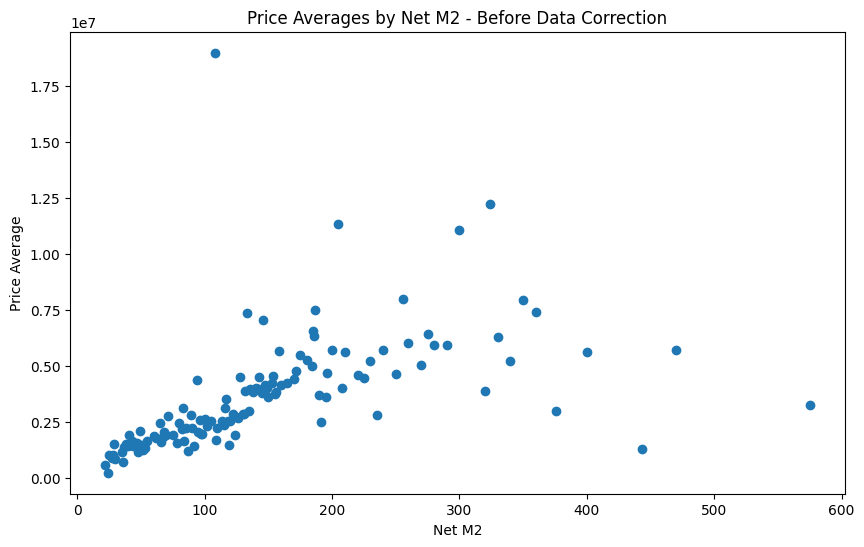

In [25]:
# Calculate and rank the "Fiyat" averages by "Oda" column.
roomPriceAvg = data.groupby("Oda ")["Fiyat"].mean().sort_values()

# Create a graph.
plt.figure(figsize=(10, 6))
plt.scatter(roomPriceAvg.index, roomPriceAvg.values)
plt.xlabel("Number of Rooms")
plt.ylabel("Price Average")
plt.title("Price Averages by Number of Rooms - Before Data Correction")
plt.show()

# Calculate and rank the "Fiyat" averages by "Bina Yaşı" column.
buildingAgePriceAvg = data.groupby("Bina Yaşı")["Fiyat"].mean().sort_values()

# Create a graph.
plt.figure(figsize=(10, 6))
plt.scatter(buildingAgePriceAvg.index, buildingAgePriceAvg.values)
plt.xlabel("Building Age")
plt.ylabel("Price Average")
plt.title("Price Averages by Building Age - Before Data Correction")
plt.xticks(rotation=45)  # x etiketlerini yatık şekilde yazdır
plt.show()

# Calculate and rank the "Fiyat" averages by "Net M2" column.
netM2PriceAvg = data.groupby(" Net M2")["Fiyat"].mean().sort_values()

# Create a graph.
plt.figure(figsize=(10, 6))
plt.scatter(netM2PriceAvg.index, netM2PriceAvg.values)
plt.xlabel("Net M2")
plt.ylabel("Price Average")
plt.title("Price Averages by Net M2 - Before Data Correction")
plt.show()

**Correlation matrix to see the relationship between columns**


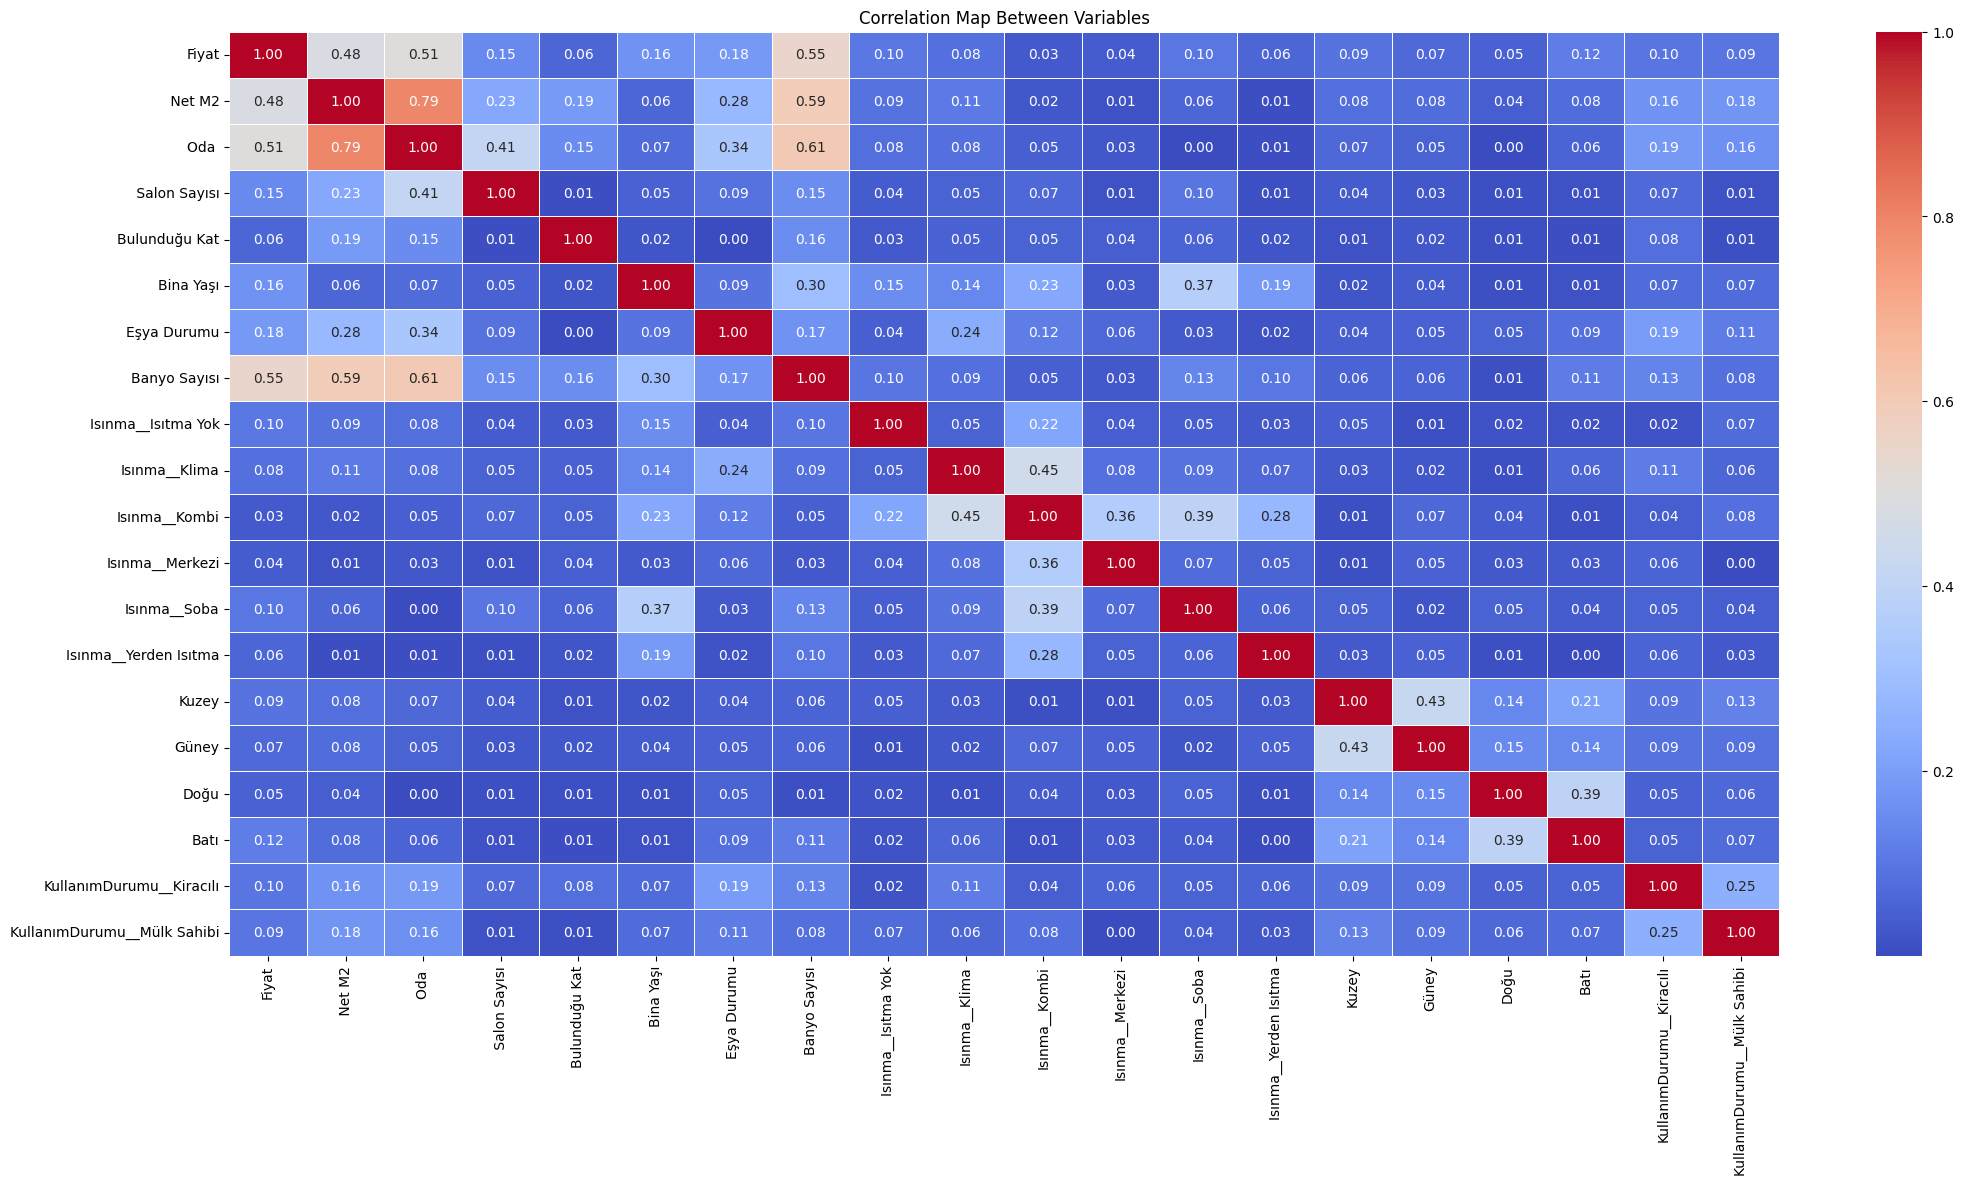

In [26]:
import seaborn as sns

corr_matrix = data.corr().abs()

# Visualise the Correlation Matrix
plt.figure(figsize=(25, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Map Between Variables')
plt.show()

**Outlier data processing stage.**


In [27]:
data = data.drop(data[(data[' Net M2'] >= 100) & (data[' Net M2'] <= 200) & (data['Fiyat'] > 25000000)].index)
data = data.drop(data[(data['Oda '] >= 10) & (data['Fiyat'] < 2000000)].index)
data.drop(columns=[" Salon Sayısı"], axis = 1, inplace = True)

**The section where dependent and independent variables are assigned.**


In [28]:
X = data.drop("Fiyat", axis=1)
y = data["Fiyat"]

**Train and Test Split & Scaling**


In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=47)

from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler on the training data
scaler.fit(X_train)

# Transform the training and testing data
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

**Installing the required algorithm**

In [30]:
!pip install xgboost

**Importing the necessary regression algorithms**


In [31]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, BayesianRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.model_selection import cross_validate
from sklearn.metrics import r2_score

regressors = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Elastic Net Regression": ElasticNet(),
    "Random Forest Regression": RandomForestRegressor(),
    "Gradient Boosting Regression": GradientBoostingRegressor(),
    "Bayesian Regression": BayesianRidge(),
    "SVR": SVR(),
    "Decision Tree Regression": DecisionTreeRegressor(),
    "KNN Regression": KNeighborsRegressor(),
    "XGBRegressor": XGBRegressor()    
}

**Model training with Cross Validation and measurement of success metrics** 


In [32]:
for name, regressor in regressors.items():

    regressor.fit(X_train, y_train)

    # Make predictions on both training and testing sets
    y_train_pred = regressor.predict(X_train)
    y_test_pred = regressor.predict(X_test)

    # Calculate R-squared scores for both training and testing sets
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    # Print the model name, train R-squared, and test R-squared scores
    print(f"{name.upper()}:")
    print(f"Train R-Squared Score: {train_r2:.6f}")
    print(f"Test R-Squared Score: {test_r2:.6f}\n")

    print(name.upper())
    scores = cross_validate(regressor, X_train, y_train,
                        scoring = ['r2', 'neg_mean_absolute_error','neg_mean_squared_error', \
                                    'neg_root_mean_squared_error', 'neg_mean_absolute_percentage_error'], cv = 10, return_train_score=True)
    scores = pd.DataFrame(scores, index=range(1,11))
        
    print(scores.iloc[:, 2:].abs().mean().apply("{:.6f}".format))
    
    print("_______________________________________________________________________")

LINEAR REGRESSION:
Train R-Squared Score: 0.515047
Test R-Squared Score: 0.587559

LINEAR REGRESSION
test_r2                                                 0.490420
train_r2                                                0.515958
test_neg_mean_absolute_error                       891105.811637
train_neg_mean_absolute_error                      877872.585695
test_neg_mean_squared_error                 2535433354158.061035
train_neg_mean_squared_error                2436384465331.886719
test_neg_root_mean_squared_error                  1564585.268720
train_neg_root_mean_squared_error                 1560410.362306
test_neg_mean_absolute_percentage_error                 0.276432
train_neg_mean_absolute_percentage_error                0.272649
dtype: object
_______________________________________________________________________
RIDGE REGRESSION:
Train R-Squared Score: 0.515046
Test R-Squared Score: 0.587561

RIDGE REGRESSION
test_r2                                                 0.490487

XGBREGRESSOR:
Train R-Squared Score: 0.989891
Test R-Squared Score: 0.771289

XGBREGRESSOR
test_r2                                                 0.693299
train_r2                                                0.992247
test_neg_mean_absolute_error                       547856.902264
train_neg_mean_absolute_error                      121240.444880
test_neg_mean_squared_error                 1473976081869.749512
train_neg_mean_squared_error                  38866524932.959641
test_neg_root_mean_squared_error                  1187121.396410
train_neg_root_mean_squared_error                  196792.338700
test_neg_mean_absolute_percentage_error                 0.181673
train_neg_mean_absolute_percentage_error                0.047451
dtype: object
_______________________________________________________________________
